In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data science project/PRCP-1010-InsClaimPred/Data/train.csv')
data.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10,0,-1,0,0,14,1,1,0,1,104,2,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,6,1,-1,0,1,11,1,1,0,1,99,2,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.7,0.4,0.607248,11,1,0,0,0,11,1,1,2,1,30,3,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.901388,10,1,-1,0,1,14,1,1,0,1,68,3,0.400000,0.780641,0.407431,2.828427,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,1.4,2.316652,11,0,0,1,0,14,1,1,2,1,104,2,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,0


In [4]:
corr = data.corr()
corr

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,1.000000,-0.000188,0.000826,0.001646,-0.001307,0.000168,0.000022,-0.000093,0.002473,-0.000479,-0.002208,-0.001261,-0.001210,-0.000177,-0.001718,-0.001129,-0.001935,-0.000500,0.001344,0.000816,-0.000999,-0.003829,-0.000976,-0.001052,-0.000403,0.000354,0.002310,-0.000850,-0.001010,-0.002956,0.000748,0.000494,-0.000928,0.002047,0.002641,0.001007,0.001944,-0.000737,0.000709,-0.000331,0.000719,-0.000451,3.638318e-03,-0.000592,0.000957,0.000788,0.000836,0.000518,9.805336e-04,-0.001249,-0.001093,-0.000157,0.001609,-0.001227,-0.001412,-0.001267,-0.001387,0.000194,-0.001267
target,-0.000188,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,-0.008237,0.001815,0.002028,0.007810,0.002460,0.007443,-0.021506,-0.027778,0.037053,0.004555,0.022888,0.034800,0.030888,0.016256,-0.031534,0.032401,0.032900,0.020754,0.011537,-0.036395,-0.020342,0.005322,0.001038,0.006129,-0.001213,0.038790,0.053899,-0.004474,0.027667,0.001782,0.001360,0.001907,3.272046e-05,0.000771,0.000082,-0.000103,-0.001006,0.000719,1.060834e-03,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.000826,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,-0.024971,0.122137,0.036896,0.101257,-0.112226,0.102212,0.183855,0.139125,-0.056121,-0.116987,0.043756,0.079042,0.213009,0.070192,-0.000639,0.138112,-0.102582,0.010794,0.008188,0.008252,0.161842,0.099752,0.034480,-0.056722,-0.000854,-0.000437,0.001214,-9.430788e-04,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.001646,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,0.000772,-0.004616,-0.001187,-0.003649,-0.003854,0.012682,-0.018727,-0.000374,0.061118,0.084260,0.070790,0.002149,0.045233,-0.002532,-0.072190,-0.008407,-0.017301,-0.011781,0.001526,0.009435,0.011401,0.014955,0.019949,-0.110247,-0.080408,-0.012272,-0.008391,0.000683,0.000932,-0.000322,-2.111049e-03,-0.001548,0.000085,-0.000172,-0.002712,0.000356,-2.542520e-05,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,-0.001307,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,0.001990,0.170449,-0.018251,0.027691,0.001316,0.003209,0.048338,0.002348,-0.028520,-0.044907,0.095658,0.072990,0.143597,0.008021,0.056337,0.003607,-0.013205,-0.008561,-0.025966,-0.059358,0.088992,0.048308,0.000539,-0.048096,0.000703,-0.000335,0.000177,7.029223e-04,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.000168,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,0.001018,-0.001217,-0.000893,-0.000691,0.077071,0.017497,0.007830,-0.025797,0.023846,0.079471,0.065702,0.029379,0.003162,0.022744,-0.045361,0.063399,0.025324,0.064655,-0.008148,-0.041983,0.023010,-0.000615,0.073486,-0.095160,-0.032233,-0.005596,0.040480,-0.002753,-0.000544,0.000

In [5]:
corr['id']

id                1.000000
target           -0.000188
ps_ind_01         0.000826
ps_ind_02_cat     0.001646
ps_ind_03        -0.001307
ps_ind_04_cat     0.000168
ps_ind_05_cat     0.000022
ps_ind_06_bin    -0.000093
ps_ind_07_bin     0.002473
ps_ind_08_bin    -0.000479
ps_ind_09_bin    -0.002208
ps_ind_10_bin    -0.001261
ps_ind_11_bin    -0.001210
ps_ind_12_bin    -0.000177
ps_ind_13_bin    -0.001718
ps_ind_14        -0.001129
ps_ind_15        -0.001935
ps_ind_16_bin    -0.000500
ps_ind_17_bin     0.001344
ps_ind_18_bin     0.000816
ps_reg_01        -0.000999
ps_reg_02        -0.003829
ps_reg_03        -0.000976
ps_car_01_cat    -0.001052
ps_car_02_cat    -0.000403
ps_car_03_cat     0.000354
ps_car_04_cat     0.002310
ps_car_05_cat    -0.000850
ps_car_06_cat    -0.001010
ps_car_07_cat    -0.002956
ps_car_08_cat     0.000748
ps_car_09_cat     0.000494
ps_car_10_cat    -0.000928
ps_car_11_cat     0.002047
ps_car_11         0.002641
ps_car_12         0.001007
ps_car_13         0.001944
p

In [6]:
data1 = data.iloc[:,1:]
data1

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [7]:
corr1 = data1.corr()
corr1

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,-0.008237,0.001815,0.002028,0.007810,0.002460,0.007443,-0.021506,-0.027778,0.037053,0.004555,0.022888,0.034800,0.030888,0.016256,-0.031534,0.032401,0.032900,0.020754,0.011537,-0.036395,-0.020342,0.005322,0.001038,0.006129,-0.001213,0.038790,0.053899,-0.004474,0.027667,0.001782,0.001360,0.001907,3.272046e-05,0.000771,0.000082,-0.000103,-0.001006,0.000719,1.060834e-03,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,-0.024971,0.122137,0.036896,0.101257,-0.112226,0.102212,0.183855,0.139125,-0.056121,-0.116987,0.043756,0.079042,0.213009,0.070192,-0.000639,0.138112,-0.102582,0.010794,0.008188,0.008252,0.161842,0.099752,0.034480,-0.056722,-0.000854,-0.000437,0.001214,-9.430788e-04,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,0.000772,-0.004616,-0.001187,-0.003649,-0.003854,0.012682,-0.018727,-0.000374,0.061118,0.084260,0.070790,0.002149,0.045233,-0.002532,-0.072190,-0.008407,-0.017301,-0.011781,0.001526,0.009435,0.011401,0.014955,0.019949,-0.110247,-0.080408,-0.012272,-0.008391,0.000683,0.000932,-0.000322,-2.111049e-03,-0.001548,0.000085,-0.000172,-0.002712,0.000356,-2.542520e-05,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,0.001990,0.170449,-0.018251,0.027691,0.001316,0.003209,0.048338,0.002348,-0.028520,-0.044907,0.095658,0.072990,0.143597,0.008021,0.056337,0.003607,-0.013205,-0.008561,-0.025966,-0.059358,0.088992,0.048308,0.000539,-0.048096,0.000703,-0.000335,0.000177,7.029223e-04,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,0.001018,-0.001217,-0.000893,-0.000691,0.077071,0.017497,0.007830,-0.025797,0.023846,0.079471,0.065702,0.029379,0.003162,0.022744,-0.045361,0.063399,0.025324,0.064655,-0.008148,-0.041983,0.023010,-0.000615,0.073486,-0.095160,-0.032233,-0.005596,0.040480,-0.002753,-0.000544,0.000270,8.255181e-04,0.001028,0.002626,-0.000151,-0.002776,0.000487,1.272742e-04,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,-0.005069,0.001742,-0.000636,-0.001831,0.001313,-0.001013,0.012326,0.004315,0.007163,-0.008252,-0.017836,-0.009124,-0.019510,-0.036213,0.012879,-0.011399,-0.010873,-0.006562,-0.007230,0.053777,-0.002084,-0.008334,0.002168,-0.002250,0.001076,-0.016302,-0.015259,-0.001427,-0.006629,-0.001739,0.002379,-0.001560,1.291697e-03,-0.000642,-0.000249,-0.001902,-0.00

### PCA 

In [8]:
from sklearn.decomposition import PCA


In [9]:
X = data1.iloc[:,1:]
X

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [10]:
y = data1.target
y

0         0
1         0
2         0
3         0
4         0
         ..
595207    0
595208    0
595209    0
595210    0
595211    0
Name: target, Length: 595212, dtype: int64

In [11]:
pca = PCA()
X = pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,50.233107,-2.275451,-3.603767,-3.402777,0.516337,-1.019500,-1.240038,3.586760,-0.084102,0.272767,2.118285,-0.826166,-1.971318,-0.526277,-2.283855,-1.342960,-0.469652,-0.876263,0.657962,-2.183374,-0.230824,-0.225330,0.043815,-0.542992,0.656275,-0.576079,0.983222,-0.415352,-0.385586,-0.351225,-0.432295,-0.244633,-0.165046,-0.530199,-0.071228,0.223806,0.854697,-0.634768,0.422952,-0.107834,0.103101,-0.684723,-0.496851,0.186814,0.044312,0.225846,-0.122718,0.020323,-0.149867,-0.047114,-0.005765,0.001148,-0.043950,0.000837,0.000599,4.082244e-14,1.729632e-12
1,43.196497,4.627205,3.576884,-1.396487,1.424127,1.994853,-3.380258,-2.453290,-2.527167,-0.764119,-1.854116,1.288233,1.956987,-0.397145,-1.281345,-1.366497,-0.456187,-0.864399,-0.349631,0.737279,-0.631374,-0.182547,-0.006796,0.700163,-0.065221,-0.370388,0.528126,-0.431579,-0.378370,0.641052,0.628353,-0.347704,0.716781,0.249698,-0.548691,0.375700,-0.127094,0.103240,-0.529041,-0.098659,0.163953,0.106855,-0.142019,0.230401,0.215995,-0.262212,-0.193758,-0.070939,-0.056249,-0.070969,0.014069,-0.002004,0.056760,-0.000524,0.000141,1.121557e-13,-3.072276e-13
2,2.203477,7.413467,-6.061916,-1.420265,-0.646947,3.409738,0.999629,-1.402396,-1.496166,1.286560,4.149863,1.165895,-2.034190,-0.650920,-1.273961,-0.363357,0.558269,0.097687,-0.367145,1.220783,-1.077477,1.136023,-0.813820,-1.587079,2.900075,0.606847,0.079829,-0.433766,-0.389838,0.648007,-0.336526,-0.257832,0.694513,-0.091904,-0.150098,0.082716,-0.139905,0.066993,-0.062209,-0.117418,0.082605,0.057743,0.083265,0.071018,0.180301,0.389879,0.125299,0.027219,-0.023818,-0.084612,-0.002713,-0.000895,0.020481,0.000115,-0.000330,7.718850e-15,-1.069679e-13
3,-41.803072,4.052414,0.123493,-6.436164,1.603096,-2.419212,2.249093,-3.466311,-0.734242,-1.304652,1.167412,1.152007,-2.041600,-0.461747,0.704613,1.663070,0.595621,2.075490,-0.422256,0.605085,1.265011,2.031521,1.051747,0.381654,-0.496031,0.113803,-0.450014,0.525219,0.646169,-0.341954,0.031385,-0.284894,-0.173097,-0.784311,-0.058954,0.172658,-0.148971,-0.150026,-0.116254,-0.129221,-0.085471,-0.154257,-0.044559,-0.009854,0.105447,0.582981,-0.313202,-0.037668,-0.008519,-0.009114,0.022095,0.000594,-0.022059,0.001417,0.000573,7.700779e-14,3.235173e-13
4,-19.820400,7.213631,-0.159922,3.510399,-4.404935,-6.124785,-0.474069,-2.485477,-0.999003,-0.392204,-1.869863,-0.800357,0.027333,-0.123442,1.684703,-0.324786,-0.442699,0.101092,-0.373672,0.645247,-0.536335,-0.104413,0.449354,1.107673,0.688711,0.064189,-0.175007,0.534567,0.640120,0.660803,-0.362126,0.749159,0.203061,-0.062934,0.390581,-0.018225,-0.158271,0.108561,0.014127,-0.121868,0.049227,0.043424,-0.170932,0.139167,0.321878,0.321641,0.045684,0.010806,-0.030160,-0.012527,0.015297,-0.000982,0.036354,0.000077,0.000063,-1.312674e-15,-5.779106e-15


In [12]:
pca.explained_variance_

array([1.08988141e+03, 3.05249527e+01, 1.32477942e+01, 8.43691185e+00,
       7.54426744e+00, 7.34775694e+00, 6.43393149e+00, 5.44229512e+00,
       4.35757636e+00, 3.53309951e+00, 2.87253923e+00, 2.13074921e+00,
       2.00094742e+00, 1.81523177e+00, 1.78040822e+00, 1.55487587e+00,
       1.44705728e+00, 1.28802737e+00, 1.24812447e+00, 1.01042158e+00,
       9.57293955e-01, 7.19254376e-01, 6.39089052e-01, 5.39225191e-01,
       4.55587075e-01, 3.10988963e-01, 2.62326378e-01, 2.47062930e-01,
       2.33636963e-01, 2.27195409e-01, 2.07263794e-01, 2.04684848e-01,
       1.72107160e-01, 1.70154760e-01, 1.55765281e-01, 1.30548150e-01,
       1.29814729e-01, 1.20790212e-01, 1.19079019e-01, 1.07441722e-01,
       1.06375090e-01, 9.77815279e-02, 9.57048752e-02, 8.26698665e-02,
       8.25054783e-02, 8.20375798e-02, 4.08720134e-02, 2.37572859e-02,
       1.83869943e-02, 1.22851292e-02, 8.33194727e-03, 2.38958443e-03,
       1.18871763e-03, 9.78115888e-04, 4.22931305e-04, 8.64622236e-30,
      

In [13]:
pca.explained_variance_ratio_

array([9.07732702e-01, 2.54234063e-02, 1.10337290e-02, 7.02687536e-03,
       6.28341600e-03, 6.11974773e-03, 5.35864727e-03, 4.53274020e-03,
       3.62930732e-03, 2.94262288e-03, 2.39246012e-03, 1.77464330e-03,
       1.66653491e-03, 1.51185737e-03, 1.48285378e-03, 1.29501400e-03,
       1.20521481e-03, 1.07276311e-03, 1.03952906e-03, 8.41552768e-04,
       7.97304206e-04, 5.99047488e-04, 5.32279961e-04, 4.49106056e-04,
       3.79446135e-04, 2.59014284e-04, 2.18484535e-04, 2.05772022e-04,
       1.94589898e-04, 1.89224902e-04, 1.72624400e-04, 1.70476465e-04,
       1.43343391e-04, 1.41717291e-04, 1.29732683e-04, 1.08730018e-04,
       1.08119172e-04, 1.00602896e-04, 9.91776896e-05, 8.94853004e-05,
       8.85969311e-05, 8.14395861e-05, 7.97099982e-05, 6.88534926e-05,
       6.87165781e-05, 6.83268781e-05, 3.40411929e-05, 1.97867999e-05,
       1.53140296e-05, 1.02319514e-05, 6.93945320e-06, 1.99022015e-06,
       9.90050717e-07, 8.14646230e-07, 3.52248028e-07, 7.20120441e-33,
      

In [14]:
pca.n_components_

57

In [15]:
pca.n_features_

57

In [16]:
pca.components_

array([[-4.95335805e-04, -3.00732552e-04,  2.13684805e-03, ...,
         6.61597453e-06,  4.97510771e-06, -1.65197263e-05],
       [ 3.03265133e-02, -2.45587683e-03,  8.95555683e-03, ...,
         3.33539357e-06, -2.01643006e-04, -4.07590898e-05],
       [-1.24047466e-01,  2.79447254e-03, -2.83893805e-01, ...,
         1.73982325e-04, -1.92180570e-04,  2.71056782e-04],
       ...,
       [-3.98279669e-05, -1.43786527e-05, -3.56246681e-05, ...,
        -2.21438727e-05, -5.04314958e-05,  1.86165929e-04],
       [ 0.00000000e+00,  1.16760586e-16, -3.11545339e-17, ...,
        -1.21864324e-16, -2.77338916e-16, -1.21430643e-16],
       [-0.00000000e+00, -2.91845478e-15, -1.68454915e-16, ...,
        -4.83987850e-16, -2.77555756e-16, -2.81892565e-17]])

<BarContainer object of 57 artists>

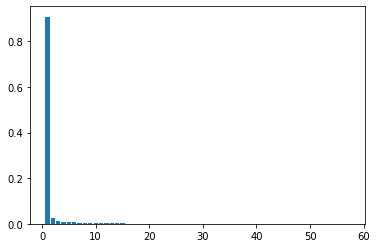

In [17]:
plt.bar(range(1,58),pca.explained_variance_ratio_)

In [18]:
X = X.iloc[:,:3]
X.head()

,0,1,2
0,50.233107,-2.275451,-3.603767
1,43.196497,4.627205,3.576884
2,2.203477,7.413467,-6.061916
3,-41.803072,4.052414,0.123493
4,-19.820400,7.213631,-0.159922


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
scaled_X=scaler.transform(X)
scaled_X

array([[ 1.521601  , -0.41185122, -0.99011418],
       [ 1.30845644,  0.83751307,  0.98272814],
       [ 0.06674509,  1.34181993, -1.66547637],
       ...,
       [ 0.94701927, -0.99026084, -1.61959428],
       [-1.17521424,  0.7840009 , -1.24658666],
       [ 0.85602416, -1.18337402, -0.12972952]])

In [ ]:
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [ ]:
pca.fit(scaled_X)

PCA(n_components=3)

In [ ]:
x = pca.transform(scaled_X)
x

array([[ 1.521601  ,  0.23851314, -1.04549462],
       [ 1.30845644,  0.11258002,  1.28627698],
       [ 0.06674509,  2.05890526, -0.5789658 ],
       ...,
       [ 0.94701927,  0.13222491, -1.89373143],
       [-1.17521424,  1.36154495, -0.56109808],
       [ 0.85602416, -0.88894396, -0.79182224]])

In [ ]:
x.shape


(595212, 3)

In [ ]:
x.view()

array([[ 1.521601  ,  0.23851314, -1.04549462],
       [ 1.30845644,  0.11258002,  1.28627698],
       [ 0.06674509,  2.05890526, -0.5789658 ],
       ...,
       [ 0.94701927,  0.13222491, -1.89373143],
       [-1.17521424,  1.36154495, -0.56109808],
       [ 0.85602416, -0.88894396, -0.79182224]])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


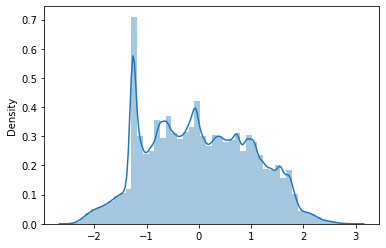

In [ ]:
sb.distplot(x)
plt.show()

In [ ]:
y.shape 

(595212,)

In [ ]:
X.shape

(595212, 3)

### next step
* EDA (on X and y)
* Selection of ml model by trying out different algorithims 
* fitting the values 

In [19]:
!pip install xgboost

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [29]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9637238496535688

In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143405
           1       0.00      0.00      0.00      5398

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.95    148803



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
confusion_matrix(y_test,y_predict)

array([[143405,      0],
       [  5398,      0]])